In [119]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
import numpy as np
import pandas as pd

In [43]:
# load data from csv files
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [67]:
# Full random forest function and k-fold cross validation with fixed parameters
# k-fold CV
k = 5
X_train, y_train = train.drop(['target','id'], axis=1).values,train.loc[:,'target'].values
# Initialize the Random Forest with specific parameters
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
    max_depth=3, max_features='auto', max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_impurity_split=None,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
    oob_score=False, random_state=0, verbose=0, warm_start=False)
# Calculate the k-Fold Cross validation Errors
k_error = cross_val_score(clf, X_train, y_train, cv=k)
print(k,'cross validation errors:\n',k_error)
print('mean error: ',np.mean(k_error))
### Source:
## Random Forests
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
## Cross validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

5 cross validation errors:
 [ 0.96355099  0.96355099  0.96355099  0.96355068  0.96355877]
mean error:  0.963552482159


In [122]:
# best model:
#grid_clf.best_estimator_
# best parameters:
#grid_clf.best_params_
# grid scores:
#grid_clf.grid_scores_

In [ ]:
# Parameter grid search performed with k-fold cross validation on a random forest algorithm
# Define 2d-parameter Grid (we can do the grid in any dimension as we want)
n_estimators, max_depth  = [5, 10, 15, 20], [2, 5, 7, 9]
param_grid = {'n_estimators': n_estimators ,'max_depth': max_depth}
# k-fold CV
k = 5
# initializes the algorithm we'll use, in this case random forest
clf = RandomForestClassifier(criterion='gini')
grid_clf = GridSearchCV(clf, param_grid, cv = k)
grid_clf.fit(X_train, y_train)
sorted('List of output we can access:\n',grid_clf.cv_results_.keys())

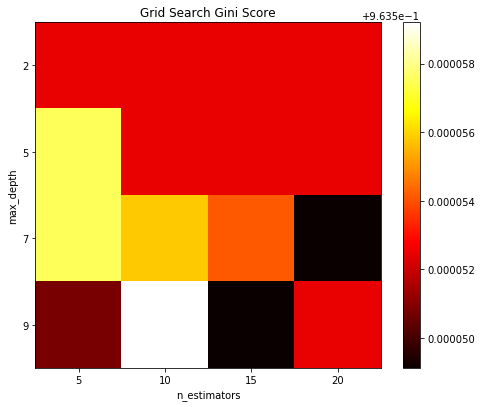

In [123]:
# Heatmap of maximum depth, vs number of estimators on the Gini coefficient
scores = grid_clf.cv_results_['mean_test_score'].reshape(len(n_estimators),len(max_depth))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.title('Grid Search Gini Score')
plt.show()

In [ ]:
# Another option for K-fold Cross validation with explicit/manual parameter grid search that we can use for Residual Networks

X, y = train.drop(['target','id'], axis=1).values,train.loc[:,'target'].values
# k-fold cross validation
k = 5
kf = KFold(n_splits=k, random_state=116687, shuffle=True)
kf.get_n_splits(X)

# Fitting Random Forests
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    


    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=2, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                oob_score=False, random_state=0, verbose=0, warm_start=False)
    #print(clf.feature_importances_)
    # Error calculation
    #print(clf.predict([[0, 0, 0, 0]]))
    
